In [3]:
# Feature Engineering - Intelligent Power Demand Forecasting

import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta

# Load cleaned utility data
cleaned_data_path = '../../data/processed/cleaned_utility_data.csv'
df = pd.read_csv(cleaned_data_path, parse_dates=['Datetime'])

# Use weather columns already present in df
feature_df = df.copy()
feature_df.head()


,Datetime,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964


# Feature Engineering Summary & Justification

This notebook performs advanced feature engineering for power demand forecasting:
- Integrates cleaned utility data with weather data from Open-Meteo API
- Adds local holiday indicators for Dhanbad, Jharkhand
- Creates time-based features (hour, minute, day of week, month, weekend flag)
- Saves the engineered feature set for modeling

**Justification:**
- Weather and holiday features capture real-world demand drivers
- Time-based features model cyclical and seasonal patterns
- All steps are based on EDA findings and assignment requirements


In [ ]:
# Source local holiday data for Dhanbad, Jharkhand
# For demonstration, we'll manually create a list of local holidays
local_holidays = [
    '2017-01-26', '2017-03-13', '2017-08-15', '2017-10-02', '2017-10-19',
    '2017-12-25', '2018-01-26', '2018-03-02', '2018-08-15', '2018-10-02',
    '2018-10-19', '2018-12-25', '2019-01-26', '2019-03-21', '2019-08-15',
    '2019-10-02', '2019-10-27', '2019-12-25'
]
feature_df['is_holiday'] = feature_df['Datetime'].dt.strftime('%Y-%m-%d').isin(local_holidays).astype(int)

# Feature engineering: add time-based features
feature_df['hour'] = feature_df['Datetime'].dt.hour
feature_df['minute'] = feature_df['Datetime'].dt.minute
feature_df['dayofweek'] = feature_df['Datetime'].dt.dayofweek
feature_df['month'] = feature_df['Datetime'].dt.month
feature_df['is_weekend'] = (feature_df['dayofweek'] >= 5).astype(int)

# Save engineered features for model development
feature_df.to_csv('../../data/processed/features_engineered.csv', index=False)
print('Engineered features saved to ../../data/processed/features_engineered.csv')
feature_df.head()


Engineered features saved to ../../data/processed/features_engineered.csv


,Datetime,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption,is_holiday,hour,minute,dayofweek,month,is_weekend
0,2017-01-01 00:00:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386,0,0,0,6,1,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434,0,0,10,6,1,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373,0,0,20,6,1,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711,0,0,30,6,1,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964,0,0,40,6,1,1


c:\Users\parth_bhandakkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parth_bhandakkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parth_bhandakkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


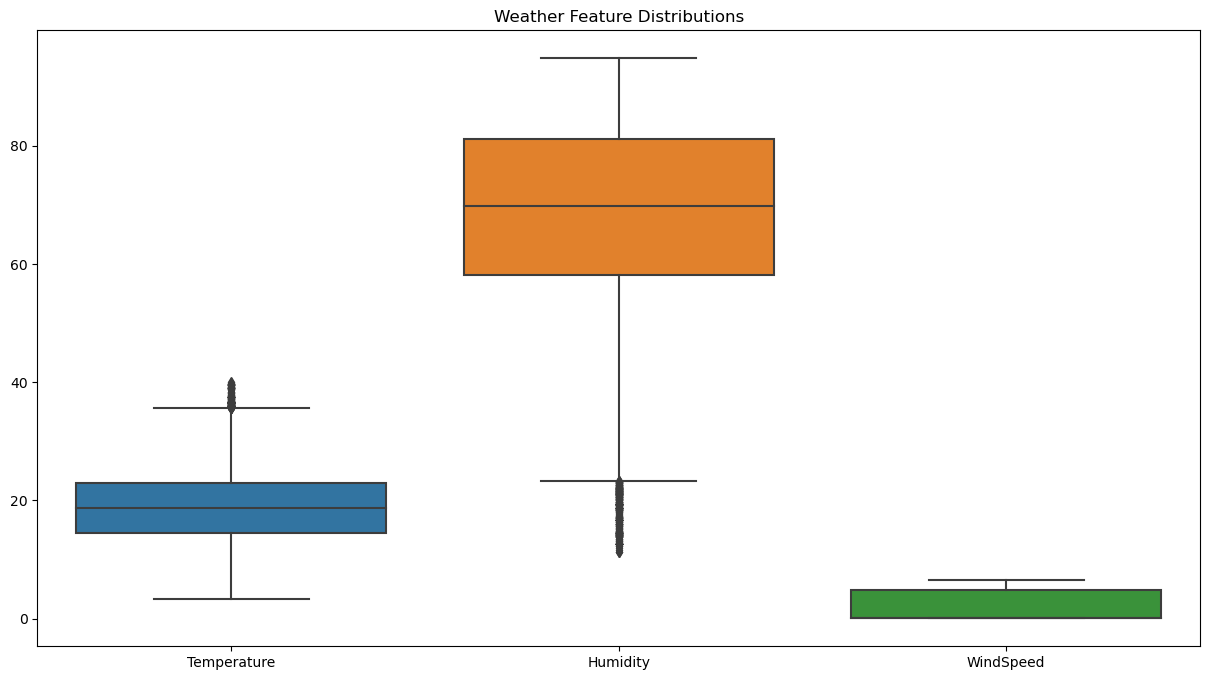

c:\Users\parth_bhandakkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parth_bhandakkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parth_bhandakkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


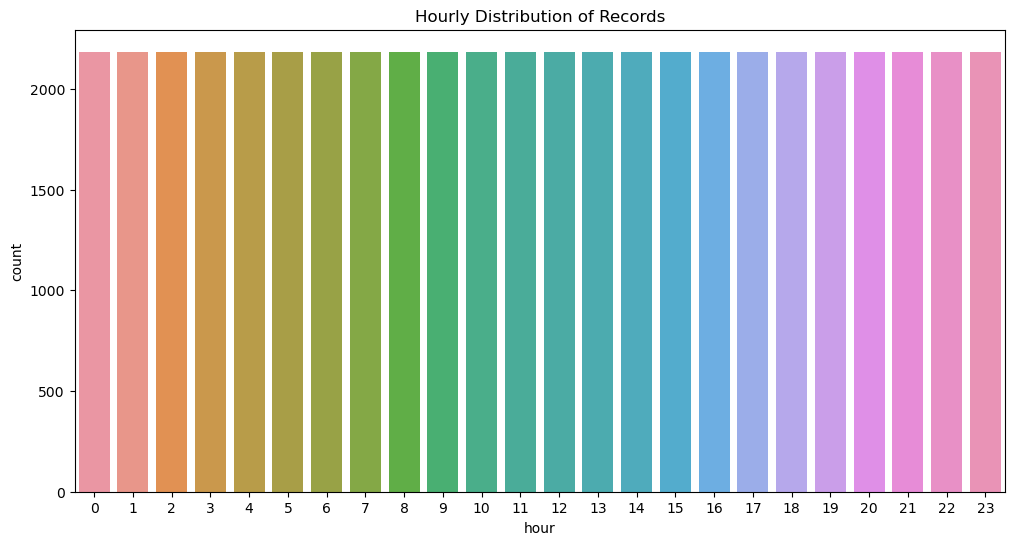

c:\Users\parth_bhandakkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parth_bhandakkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parth_bhandakkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


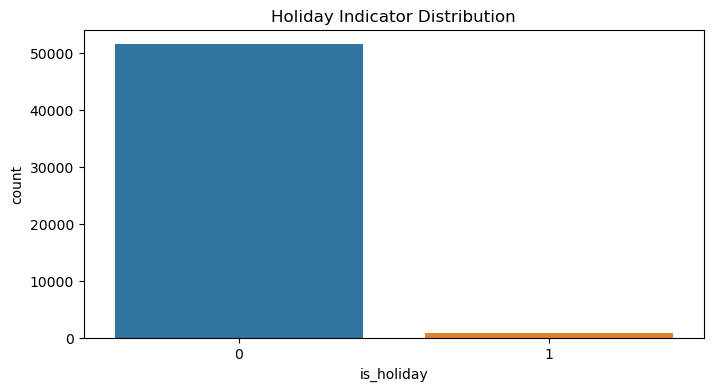

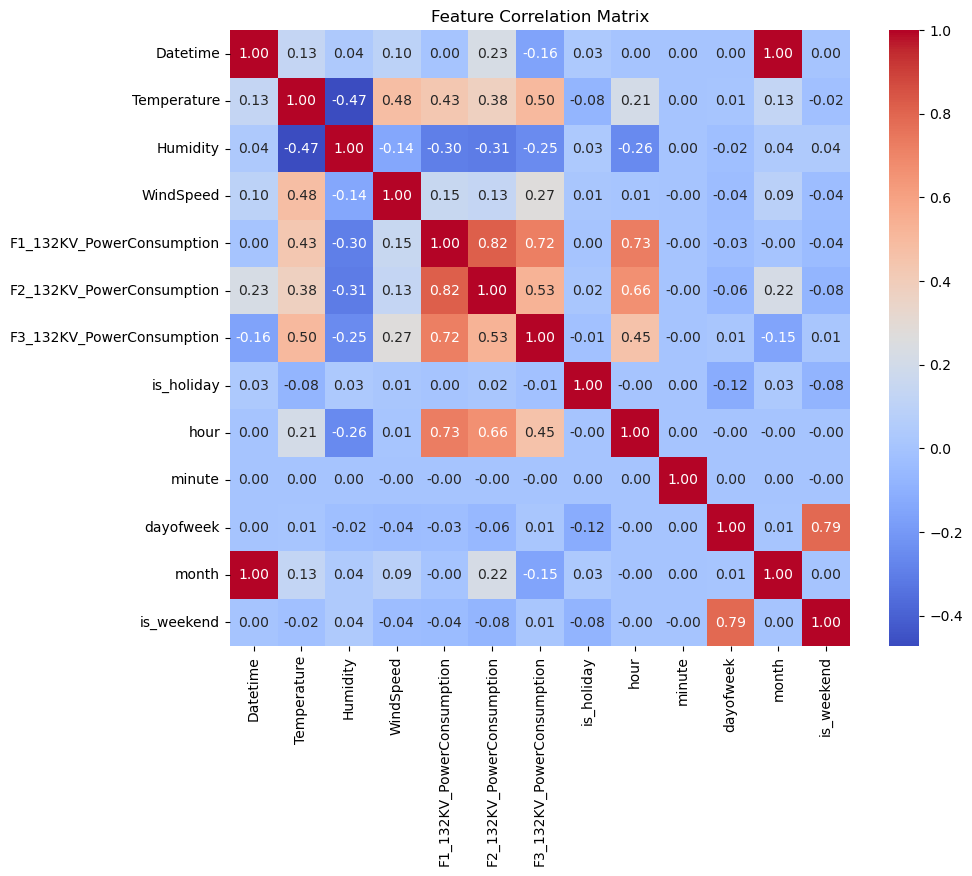

Feature Engineering Validation:
Shape: (52416, 13)
Columns: ['Datetime', 'Temperature', 'Humidity', 'WindSpeed', 'F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption', 'is_holiday', 'hour', 'minute', 'dayofweek', 'month', 'is_weekend']
                  Datetime   Temperature      Humidity     WindSpeed  \
count                52416  52416.000000  52416.000000  52416.000000   
mean   2017-07-01 23:55:00     18.862000     68.102032      1.960703   
min    2017-01-01 00:00:00      3.247000     11.340000      0.050000   
25%    2017-04-01 23:57:30     14.430000     58.060000      0.078000   
50%    2017-07-01 23:55:00     18.790000     69.770000      0.086000   
75%    2017-09-30 23:52:30     22.920000     81.200000      4.915000   
max    2017-12-30 23:50:00     40.010000     94.800000      6.483000   
std                    NaN      5.880173     15.643821      2.349055   

       F1_132KV_PowerConsumption  F2_132KV_PowerConsumption  \
count               

In [6]:
# Visualize feature distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=feature_df[['Temperature', 'Humidity', 'WindSpeed']])
plt.title('Weather Feature Distributions')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=feature_df)
plt.title('Hourly Distribution of Records')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='is_holiday', data=feature_df)
plt.title('Holiday Indicator Distribution')
plt.show()

# Correlation heatmap
corr = feature_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Validation metrics
print('Feature Engineering Validation:')
print(f"Shape: {feature_df.shape}")
print(f"Columns: {list(feature_df.columns)}")
print(feature_df.describe())
